In [1]:
from prerequisites import *

# Chapter 7 Differential equations
***

### Autonomy
**Def**: An **autonomous** ODE is one where the independent variable $t$ does not explicitly appear. A **nonautonomous** one is one where $t$ does explicitly appear.  
Example: $\frac{dx}{dt} = ax$ is autonomous, $\frac{dx}{dt} = ax+\sin(t)$ is not.

## Chapter 7.1 One Dimensional Linear Differential Equations
***

### Flow
**Def**: The **flow** of an autonomous differential equation of an autonomous is the
function of time $t$ and initial value $x_0 = x(0)$ which represents the set of solutions. Thus
$F(t, x_0)$ is the value at time $t$ of the solution with initial value $x_0$. We will often
use the slightly different notation $F_t(x_0)$ to mean the same thing.  
Example: For the diffeq $\frac{dx}{dt} = ax$ the flow is given by $F(t, x_0) = x_0 \cdot e^{at}$.

### Equilibrium
**Def**: A constant solution of the autonomous DE $\frac{dx}{dt} = f(x)$ is called an **equilibrium** .  
*Remark*: Clearly, any constant solution satisfies $\frac{dx}{dt} = 0$ and therefore $f(x) = 0$. This is the main way of finding equilibria - solve $f(x) = 0$.  
Example: for $\frac{dx}{dt} = ax$ the equilibria is given by solving $ax = 0\Longrightarrow x = 0$. So $x = 0$ is the equilibrium point.


## Chapter 7.2 One Dimensional Nonlinear Differential Equations
***

### Condition for solving ODEs numerically
**Def**: We wish for the following conditions to hold so that we could solve an ODE numerically:
1. Existence: Each point in the $(t, x)$-plane has a solution passing through it. The solution has slope given by the differential equation at that point.
2. Uniqueness: Only one solution passes through any particular $(t, x)$.
3. Continuous dependence: Solutions through nearby initial conditions remain close over short time intervals. In other words, the flow $F(t, x_0)$ is a continuous function of $x_0$ as well as $t$.  
*Remark*: Using condition 1. we can draw the **slope field**, and for autonomous systems we know that this field is independent of $t$. By condition 2. we know that all the solution curves are non-intersecting. And finally condition 3. means that if we start at a point and follow the slope field with small increments, then we will recover a solution that is close to the real solution at least for some small time.

### Phase portrait
*Tldr*: The phase portrait of a differential equation partitions the space along regions where one of the derivatives is zero and tells us for each region schematically, what direction do the points go in (based on the signs of the derivatives in this region).  


### Attracting and repelling equilibria
*Tldr*: An equilibrium solution is called **attracting** or a **sink** if the trajectories of nearby initial conditions converge to it. It is called **repelling** or a **source** if the trajectories of nearby initial conditions diverge from it.

### Exercise T7.1
> Draw the slope field and phase portrait for $x' = x^3 - x$. Sketch the resulting
family of solutions. Which initial conditions lead to bounded solutions?

*Proof*: **TODO**

### Computer experiment 7.1
> To do the Computer Experiments in the next few chapters, you may need to
read Appendix B, an introduction to numerical solution methods for differential
equations. A good practice problem is to choose some version of the RungeKutta algorithm described there and plot solutions of the differential equations
of Figures 7.1, 7.3 and 7.5.

We implemented the `ode23` scheme as per appendix A of the book. Below can be seen a test of it (blue) plotted against the real solution (orange), along with the error plot on the side. The accuracy is quite good.

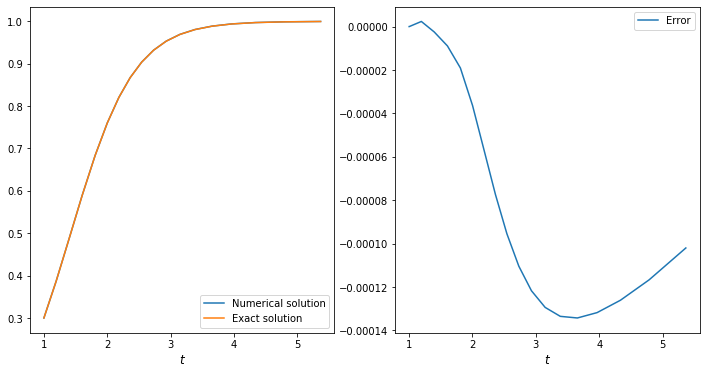

In [2]:
def f(t, x, c):
    return c*x*(1-x)

t0 = 1
t  = 5
x0 = 0.3
a  = 2
T, X = ode23(t0, t, x0, f, a)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(T, X, label = "Numerical solution")
Y = x0/(x0+(1-x0)*np.exp(-a*(T-t0)))
axs[0].plot(T, Y, label = "Exact solution")
axs[0].set_xlabel("$t$")
axs[0].legend()
axs[1].plot(T, Y-X, label = "Error")
axs[1].set_xlabel("$t$")
axs[1].legend();

## Chapter 7.3 Linear Differential Equations in More than One Dimensions
***

### Exercise T7.2
> (a) Verify the statements made in Example 7.6.   
(b) Find all solution curves of (7.17). Solve for $y(t)$ first, then try to guess the form of a solution for
$x(t)$

*Proof*: $\begin{cases}x' = 3x+y\\ y' = 3y\end{cases}$. We can see that this ODE is defined by the matrix $A = \begin{pmatrix}1 & 3\\0&1\end{pmatrix}$. Since $A$-upper triangular, its eigenvalues can be read from its diagonal and therefore the only eigenvalue is $3$. The kernel of $A-3I = \begin{pmatrix}0 & 1\\0&0\end{pmatrix}$ is the set of all scalar multiples of $\begin{pmatrix}1\\0\end{pmatrix}$, and so these are exactly the eigenvectors.

To solve, assume $x(0) = x_0, y(0)=y_0$ and note that $y'=3y\Longrightarrow y = y_0e^{3t}$ immediately. Now plug into $x' = 3x+y_0e^{3t}\Longrightarrow -3x+x'=y_0e^{3t}$, the IF is $e^{-3t}$, so $\left(e^{-3t}x\right)' = y_0\Longrightarrow e^{-3t}x = y_0t+A$, plugging in $0$ can verify that $A = x_0$, so $x = (y_0t+x_0)e^{3t}$. This can also be seen numerically.

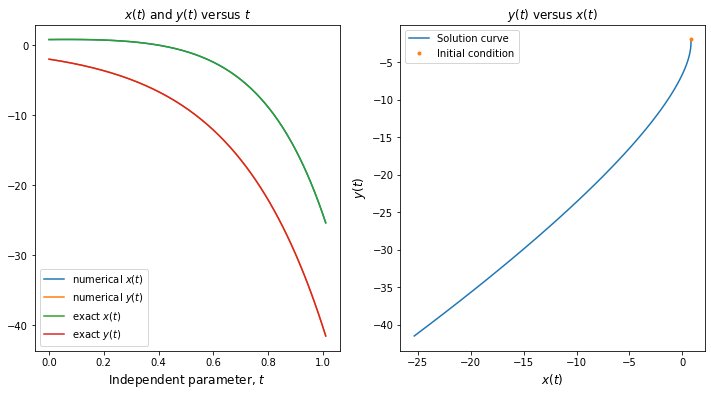

In [3]:
def f(t, x, c):
    A = np.array([[3, 1], [0, 3]])
    return np.dot(A, x)

t0 = 0
t  = 1
x0 = np.array([0.8, -2])
T, X = ode23(t0, t, x0.copy(), f, None)
X, Y = zip(*X)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(T,X, label = "numerical $x(t)$")
axs[0].plot(T,Y, label = "numerical $y(t)$")
axs[0].plot(T,(x0[1]*T+x0[0])*np.exp(3*T), label = "exact $x(t)$")
axs[0].plot(T,x0[1]*np.exp(3*T), label = "exact $y(t)$")
axs[0].legend()
axs[0].set_xlabel('Independent parameter, $t$')
axs[0].set_title('$x(t)$ and $y(t)$ versus $t$')
axs[1].plot(X,Y, label="Solution curve")
axs[1].plot(x0[0],x0[1], ".", label = "Initial condition")
axs[1].set_xlabel('$x(t)$')
axs[1].set_ylabel('$y(t)$')
axs[1].set_title('$y(t)$ versus $x(t)$');
axs[1].legend()

### Exercise T7.3
> Explain why the trajectories in the phase planes of Figure 7.9(a) circle the
origin clockwise.

*Proof*: We have the system $\begin{cases}x' = y\\ y' = -x\end{cases}$. Note that if we are left of the origin, our $x$ coordinate will be negative and therefore $y'>0$ so the $y$ coordinate will be increasing, but this would be reversed if we were moving counterclockwise.

### Stability
*Tldr*: Solutions of nearby initial conditions dont get too far away.  
**Def**: An equilibrium point $v$ is called **stable** or **Lyapunov stable** if every initial point $v_0$ that is chosen very close to $v$ has the property that the solution $F(t, v_0)$ stays close to $v$ for all $t\geq 0$.   
More formally, for any neighborhood $V$ of $v$ there exists a neighborhood $U\subseteq V$ of $v$, such that for
each initial point $v_0$ in $U$, the solution $F(t, v0)\subseteq V$ for all $t\geq 0$.   
An equilibrium is called **asymptotically stable** if it is both stable and attracting.  
An equilibrium is called **unstable** if it is not stable.   
Finally, an equilibrium is **globally asymptotically stable** if it is asymptotically stable and all initial values converge
to the equilibrium.  
Example: **TODO**

### Computer experiment 7.2
> Although linear systems can be solved with linear algebra, most nonlinear
systems do not yield to analytic methods. For example, for the equation
$$\begin{cases}
x' = y - x^2\\
y' = -x
\end{cases}$$
obtained by adding a single nonlinear term to (7.18), we are reduced to numerical
approximation methods, summarized in Appendix B. Plot solution curves of
(7.26) near the origin. According to this evidence, do you expect that the origin
is asymptotically stable? Lyapunov stable?

*Proof*: Below I have plotted the slope field along with solution curves corresponding to $10$ initial conditions at distance $0.1, 0.2$ and $0.3$ from the origin. As can be seen the solution curves are "closed", so they are neither attracted to nor repelled from the origin. So I think that the origin is Lyapunov stable but not asymptotically so.

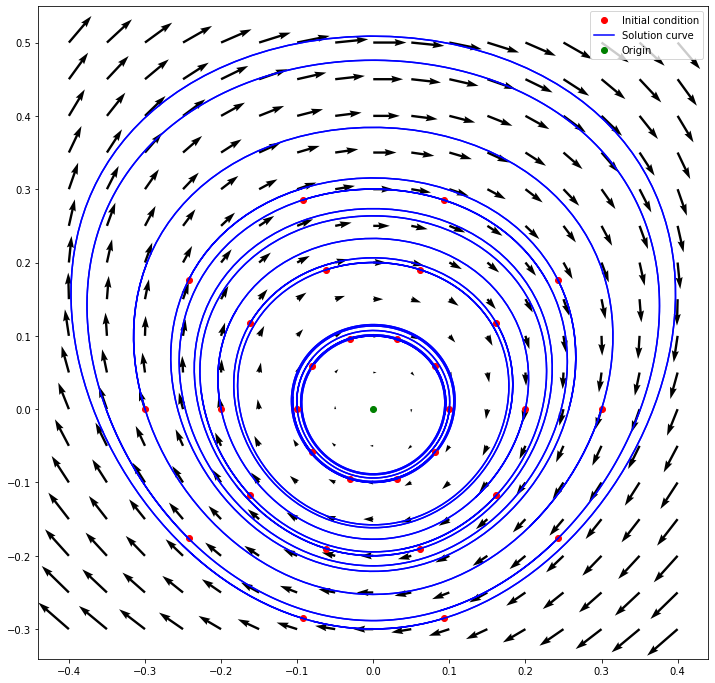

In [51]:
def f(t, x, c):
    u, v = x
    return np.array([v-u*u, -u])

t0 = 0
t  = 7
N = 10

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
for j in range(3):
    for i in range(N):
        x0 = 0.1*(j+1)*np.array([np.cos(2*np.pi*i/N),np.sin(2*np.pi*i/N)])
        T, X = ode23(t0, t, x0.copy(), f, None, 1e-5)
        X, Y = zip(*X)
        if i == 0 and j ==0:
            ax.plot(x0[0],x0[1],"ro",label="Initial condition")
            ax.plot(X,Y,"b",label="Solution curve")
        else:
            ax.plot(x0[0],x0[1],"ro")
            ax.plot(X,Y,"b")

ax.plot(0, 0, "go", label = "Origin")
X = np.arange(-0.4, 0.45, 0.05)
Y = np.arange(-0.3, 0.55, 0.05)
U, V = np.meshgrid(X, Y)
ax.quiver(X, Y, V-U*U, -U)
ax.legend()

## Chapter 7.4 Nonlinear Systems
***

### Existance and uniqueness theorem
*Tldr*: If all functions of your first order ODE in normal form are continuous and have all their partial derivatives continuous in some open neighbourhood $U$ then a unique solution exists in a neighbourhood of any initial condition in $U$.  
**Thm**: Consider the first order differential equation $\mathbf{x}^\prime = \mathbf{R}(\mathbf{x})$, where $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ and $\mathbf{R} = (R_1(x_1, x_2, \ldots, x_n), R_2(x_1, x_2, \ldots, x_n), \ldots, R_n(x_1, x_2, \ldots, x_n))$.   If each of $R_i$ and $\frac{\partial R_i}{\partial x_j}$ are continuous on some open set $U$ for every $1 \leq i, j \leq n$, then for any real number $t_0$ and real vector $\mathbf{x}_0\in U$ there exists an open interval of $t_0$ on which there **exists a unique solution** satisfying $\mathbf{x}(t_0) = \mathbf{x}_0$.  
*Remark*: This is nice, since it means that the forst two of the conditions outlined before for the ability of numerical solutions of ODES (Existance, Uniqueness) are satisfied.

### Lipschitzness
**Def**: Let $U\subseteq \mathbb{R}^n$, A function $\mathbf{f}:\mathbb{R}^n\rightarrow \mathbb{R}^n$ is said to be **Lipschitz** on $U$ if there exists some constant $L$ such that for all $\mathbf{x},\mathbf{y}\in U$
$$|\mathbf{f}(\mathbf{x})-\mathbf{f}(\mathbf{y})| \leq L|\mathbf{x}-\mathbf{y}|$$
Any such constant is called a **Lipschitz constant** for $\mathbf{f}$.  
*Remark*: If $\mathbf{f}$ has bounded first partial derivatives in $U$, then it is Lipschitz by the mean value theorem (or some generalization to higher dimensions).

### Exercise T7.7
> The general two-dimensional linear equation is $v' = Av$ where
$A = \begin{pmatrix}a&b\\c&d\end{pmatrix}$.
Find a Lipschitz constant for the function $v\mapsto Av$ on $\mathbb{R}^2$ in terms of $a, b, c$,
and $d$.

*Proof*: Consider $|Ax - Ay|$, by linearity we may rewrite this as $|A(x-y)|$ and if we let $v = x-y$, then we are now considering $|Av|$. Now let $v = (v_1, v_2, \ldots, v_n)$ and $A=(a_{ij})$, then
$$|Av|^2 = (a_{11}v_1 + a_{12}v_2 + \ldots+ a_{1n}v_n)^2 + (a_{21}v_1+\ldots+a_{2n}v_n)^2+\ldots \leq $$
$$\leq\left(\sum_{i=1}^n\sum_{j=1}^n a_{ij}^2\right)(v_1^2+v_2^2+\ldots+v_n^2) = \left(\sum_{i=1}^n\sum_{j=1}^n a_{ij}^2\right) |v|^2$$
But this is exactly what we needed to show.  
So in the $2\times 2$ case we could take $L = \sqrt{a^2+b^2+v^2+d^2}$.

### Continuous dependence on inital conditions theorem (Gronwall inequality)
*Tldr*: If a function in Lipschitz then its solutions cant come apart too much.  
**Thm**: Let $\mathbf{R}:U\rightarrow\mathbb{R}^n$ be defined on the open set $U\subseteq \mathbb{R}^n$, and assume that $\mathbf{R}$ has Lipschitz constant $L$. Let $\mathbf{v}(t)$ and $\mathbf{w}(t)$ be solutions of the differential equation $\frac{d\mathbf{x}}{dt} = \mathbf{R}$, and let $[t_0, t_1]$ be a subset of the
domains of both solutions. Then
$$|\mathbf{v}(t) - \mathbf{w}(t)| \leq |\mathbf{v}(t_0) - \mathbf{w}(t_0)|e^{L(t-t_0)}$$
for all $t\in [t_0, t_1]$.  
*Remark*: What this gives us the turn condition, continuous dependence on initial conditions, which means that when we numerically approximate a solution, we cant go too far off at each simulation time step.

### Hyperbolic equilibria
**Def**: The equilibrium $\mathbf{x}_e$ of the system $\mathbf{x}^\prime = \mathbf{R}(\mathbf{x})$ is called **hyperbolic** if none of the eigenvalues of the Jacobian $\mathbf{DR}(\mathbf{x}_e)$ have real part equal to zero.

### Linear stability theorem
**Thm**: Let $\mathbf{x}_e$ be an equilibrium of the system $\mathbf{x}^\prime = \mathbf{R}(\mathbf{x})$. If the real part of each eigenvalue of $\mathbf{DR}(\mathbf{x}_e)$ is strictly negative, then $\mathbf{x}_e$ is asymptotically stable. If the real part of each eigenvalue is strictly positive, then $\mathbf{x}_e$ is unstable.